In [18]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 

In [19]:
aaSelect <- function(df, AA){
    aaDf <- df %>% select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, starts_with(AA)) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 
    
    return(aaDf)
}

aaLong <-  function(df, AA){
    aaL <- df %>% gather(week, level, starts_with(AA))
    
    aaL[aaL == paste(AA, 'Calostrum', sep = '')] = 1
    aaL[aaL == paste(AA, 'Transition', sep = '')] = 2
    aaL[aaL == paste(AA, 'Mature2m', sep = '')] = 8
    aaL[aaL == paste(AA, 'Mature4m', sep = '')] = 16

    aaL <- aaL %>% mutate(week = as.numeric(week))
    
    return(aaL)
}

In [20]:
AA_Sex_1 <- read_sav("~/Documents/AA-leche-humana/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1)

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,⋯,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
<dbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,17,1,2009-08-20,25,24,24,22,3492.7,⋯,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,⋯,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,⋯,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [21]:
AA <- 'GLU'

AAdf <- aaSelect(AA_Sex_1, AA) %>% select(-contains('GLOB')) 
AAdf <- AAdf %>% filter(!is.na(AAdf$sex))
AAdfLong <- aaLong(AAdf, AA)

head(AAdf)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

id,group,age,sex,GLUCalostrum,GLUTransition,GLUMature2m,GLUMature4m
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,teen,17,girl,89,89,99,72
2,teen,16,boy,4,103,104,191
3,teen,17,boy,54,122,NA,NA
4,teen,16,boy,33,NA,NA,NA
6,teen,16,boy,30,67,92,110
7,teen,16,boy,34,97,115,130


In [22]:
AAdf %>% filter(is.na(GLUTransition) | is.na(GLUMature2m) | is.na(GLUMature4m) )

id,group,age,sex,GLUCalostrum,GLUTransition,GLUMature2m,GLUMature4m
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,teen,17,boy,54,122,NA,NA
4,teen,16,boy,33,NA,NA,NA
9,teen,17,girl,27,72,NA,NA
10,teen,18,boy,84,141,NA,NA
11,teen,17,boy,64,84,NA,158
12,teen,16,girl,17,NA,NA,NA
16,teen,15,boy,43,197,179,NA
17,teen,16,boy,9,79,117,NA
18,teen,16,boy,69,85,184,NA


In [23]:
AAdf %>% filter(group == 'adult') %>% 
    filter( (!is.na(GLUTransition)) & is.na(GLUMature2m) )

id,group,age,sex,GLUCalostrum,GLUTransition,GLUMature2m,GLUMature4m
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
46,adult,19,girl,7,40,NA,74
48,adult,19,boy,34,48,NA,110
51,adult,23,girl,4,82,NA,99
67,adult,19,girl,40,76,NA,118


In [24]:
AAdf %>% filter(group == 'adult') %>% 
    filter( (is.na(GLUTransition)) & !is.na(GLUMature2m) )

id,group,age,sex,GLUCalostrum,GLUTransition,GLUMature2m,GLUMature4m
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
66,adult,22,boy,59,NA,128,122


In [25]:
AAdf %>% filter(group == 'adult') %>% 
    filter( is.na(GLUTransition) &  !is.na(GLUMature4m))

id,group,age,sex,GLUCalostrum,GLUTransition,GLUMature2m,GLUMature4m
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
66,adult,22,boy,59,NA,128,122


In [26]:
AAdf %>% filter(group == 'teen') %>% 
    filter( !is.na(GLUTransition) & is.na(GLUMature2m) )

id,group,age,sex,GLUCalostrum,GLUTransition,GLUMature2m,GLUMature4m
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,teen,17,boy,54,122,NA,NA
9,teen,17,girl,27,72,NA,NA
10,teen,18,boy,84,141,NA,NA
11,teen,17,boy,64,84,NA,158
22,teen,16,boy,51,79,NA,NA
36,teen,16,girl,27,110,NA,2
38,teen,17,boy,75,110,NA,NA


In [27]:
AAdf %>% filter(group == 'teen') %>% 
    filter( is.na(GLUTransition) & !is.na(GLUMature4m) )

id,group,age,sex,GLUCalostrum,GLUTransition,GLUMature2m,GLUMature4m
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
35,teen,18,boy,46,NA,136,144


In [28]:
df <- data.frame(x = c(1, NA, 3, 8), y = c(1, NA, NA, 8))

df %>% filter(is.na(x) | is.na(y))

x,y
<dbl>,<dbl>
NA,NA
3,NA


# Dropout mechanism: 

Suppose the data is organized in a long format where each individual appears in more than one row: 


| Id |DO |week | sex | group |
|:--:|:--:|:---:|:---:|:-----:|
|1  |NO	| 1 | G = 0 | T 
|2  |NO	| 1 | B = 1 | A
|1  |YES| 3	| G = 0 | T
|1  |NO	| 2 | G = 0 | T


where $DO$ register if patient $i$ came to the corresponding measurement session. Then, the model for the probability of dropping out is: 

$$
logit \left( P(DO_i = 1) \right) = \beta_1 \ week + \beta_2 \ group + \beta_3 \ group \times week  
$$

where the $\beta_1$ is the time effect for adults and $\beta_2 + \beta_3$  is the time effect for teens. The intercept is $0$ since we already have an interaction term. 

In [29]:
AAdfLong %>% filter(id == 3)

id,group,age,sex,week,level
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
3,teen,17,boy,1,54
3,teen,17,boy,2,122
3,teen,17,boy,8,NA
3,teen,17,boy,16,NA


In [30]:
AAdfLongDO <- AAdfLong %>% 
        mutate(DO = ifelse(is.na(level), 1, 0)) %>% 
        select(-level, -id) 

head(AAdfLongDO)

group,age,sex,week,DO
<fct>,<dbl>,<fct>,<dbl>,<dbl>
teen,17,girl,1,0
teen,16,boy,1,0
teen,17,boy,1,0
teen,16,boy,1,0
teen,16,boy,1,0
teen,16,boy,1,0


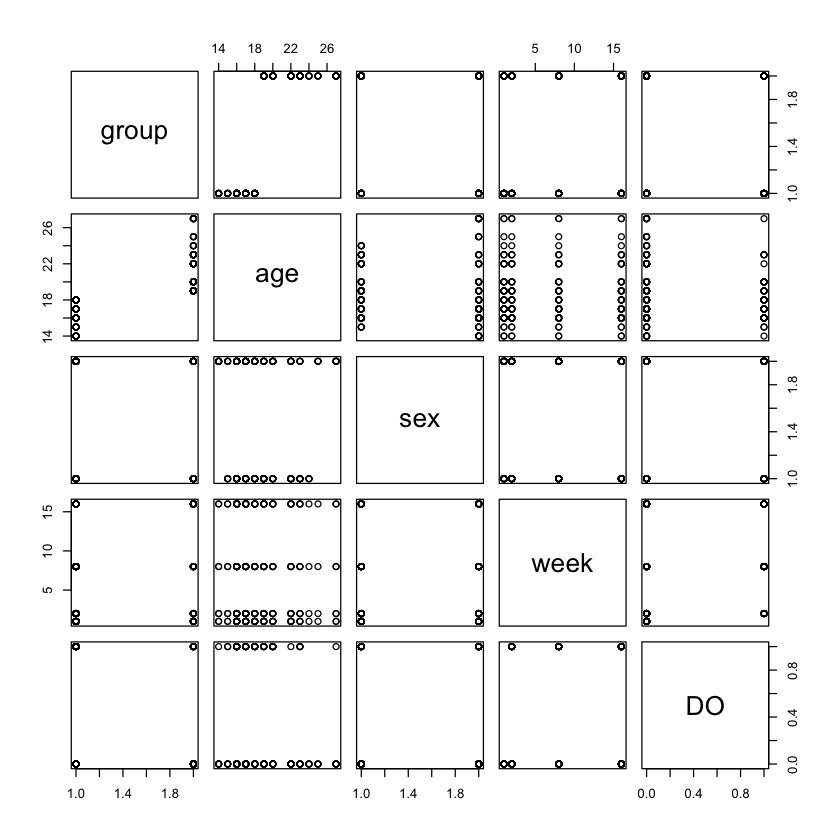

In [31]:
pairs(AAdfLongDO)

In [32]:
pDO <- glm(DO ~ week + group, data=AAdfLongDO, family = binomial(link='logit'))
summary(pDO)


Call:
glm(formula = DO ~ week + group, family = binomial(link = "logit"), 
    data = AAdfLongDO)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.15126  -0.70844  -0.57278  -0.07158   2.02799  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.83535    0.28631  -6.410 1.45e-10 ***
week         0.11084    0.02514   4.409 1.04e-05 ***
groupadult  -0.30584    0.32263  -0.948    0.343    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 274.42  on 243  degrees of freedom
Residual deviance: 253.26  on 241  degrees of freedom
AIC: 259.26

Number of Fisher Scoring iterations: 4


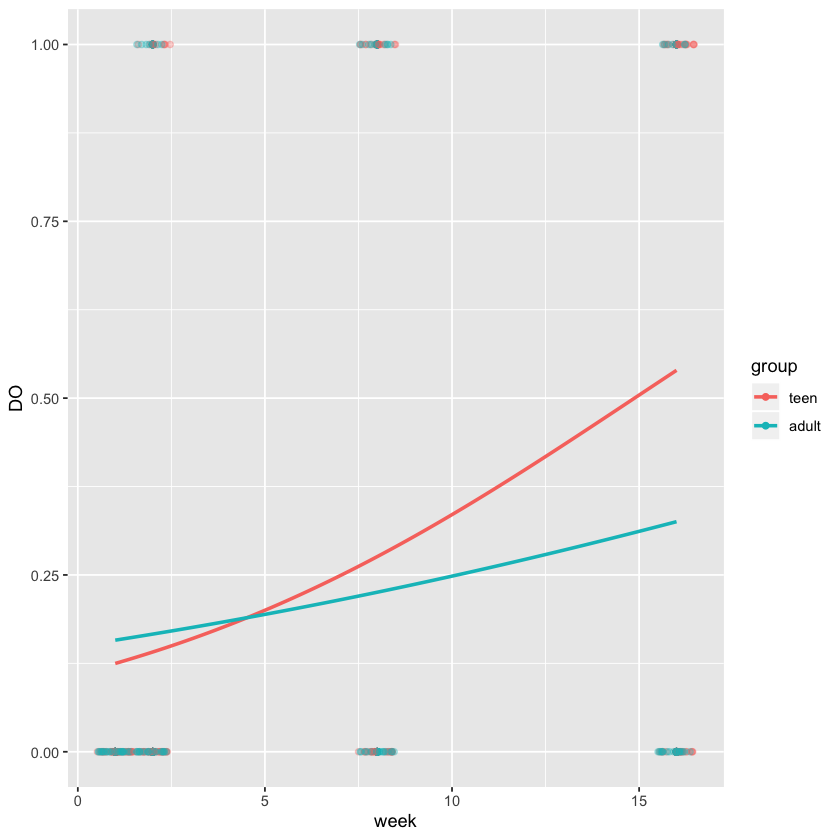

In [33]:
ggplot(AAdfLongDO, aes(x = week, y = DO, color = group)) + 
    geom_point() + geom_jitter(alpha = 0.3, width = 0.5, height = 0) +
    geom_smooth(method = glm, formula = y ~ x, method.args = list(family = "binomial"), se = FALSE)

In [34]:
pDO <- glm(DO ~ week*group, data=AAdfLongDO, family = binomial(link='logit'))
summary(pDO)


Call:
glm(formula = DO ~ week * group, family = binomial(link = "logit"), 
    data = AAdfLongDO)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2450  -0.7150  -0.5514  -0.1095   1.9793  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.08757    0.34844  -5.991 2.08e-09 ***
week             0.14033    0.03271   4.289 1.79e-05 ***
groupadult       0.34976    0.53676   0.652    0.515    
week:groupadult -0.07730    0.05197  -1.487    0.137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 274.42  on 243  degrees of freedom
Residual deviance: 251.05  on 240  degrees of freedom
AIC: 259.05

Number of Fisher Scoring iterations: 4


# Missing at random

In [35]:
AA_E_Long <- read.csv('./datos/AA_E_Long.csv')
AA_NE_Long <- read.csv('./datos/AA_NE_Long.csv')

head(AA_NE_Long)

X,id,group,age,sex,weekNames,level,week,AA
<int>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>
1,1,teen,17,girl,ARGCalostrum,1,1,ARG
2,2,teen,16,boy,ARGCalostrum,1,1,ARG
3,3,teen,17,boy,ARGCalostrum,1,1,ARG
4,4,teen,16,boy,ARGCalostrum,1,1,ARG
5,5,teen,16,NA,ARGCalostrum,2,1,ARG
6,6,teen,16,boy,ARGCalostrum,2,1,ARG


In [44]:
missingLevel <- AA_NE_Long %>% filter(is.na(level)) %>% group_by(id, AA, age, sex) %>% summarise(n_miss = n())

missingLevel %>% filter(n_miss > 2, AA == 'ALA')

Warning message:
“Factor `sex` contains implicit NA, consider using `forcats::fct_explicit_na`”

id,AA,age,sex,n_miss
<int>,<fct>,<int>,<fct>,<int>
4,ALA,16,boy,3
5,ALA,16,NA,3
12,ALA,16,girl,3
21,ALA,18,girl,3
24,ALA,18,boy,3
25,ALA,17,boy,3
33,ALA,16,girl,3
34,ALA,16,girl,3
43,ALA,20,NA,3
